In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd



In [2]:
mutation_data = pd.read_csv('full_mutation_data.csv')

In [3]:
mutation_data

,Unnamed: 0,Patient,gene,gene_variant,loci,ref,alt,gene_type,mutation_nucleotide,mutation_aminoacide
0,0,MF362760,ND1,upstream_gene_variant,152,T,C,protein_coding,c.-3155T>C,NaN
1,1,MF362760,ND1,upstream_gene_variant,186,C,A,protein_coding,c.-3121C>A,NaN
2,2,MF362760,ND1,upstream_gene_variant,263,A,G,protein_coding,c.-3044A>G,NaN
3,3,MF362760,ND1,upstream_gene_variant,750,A,G,protein_coding,c.-2557A>G,NaN
4,4,MF362760,ND1,upstream_gene_variant,1438,A,G,protein_coding,c.-1869A>G,NaN
...,...,...,...,...,...,...,...,...,...,...
2676,2676,KF540700,ND6,upstream_gene_variant,16223,C,T,protein_coding,c.-1550G>A,NaN
2677,2677,KF540700,ND6,upstream_gene_variant,16242,C,T,protein_coding,c.-1569G>A,NaN
2678,2678,KF540700,ND6,upstream_gene_variant,16249,T,C,protein_coding,c.-1576A>G,NaN
2679,2679,KF540700,ND6,upstream_gene_variant,16319,G,A,protein_coding,c.-1646C>T,NaN


In [4]:
# Filtering the dataset based on the patient origin (Chinese and Armenian)
chinese_patients = mutation_data[mutation_data['Patient'].str.startswith('KF')]
armenian_patients = mutation_data[mutation_data['Patient'].str.startswith('MF')]


# Number of unique mutations
unique_mutations_chinese = chinese_patients.drop_duplicates(subset=['gene', 'loci', 'ref', 'alt']).shape[0]
unique_mutations_armenian = armenian_patients.drop_duplicates(subset=['gene', 'loci', 'ref', 'alt']).shape[0]

(unique_mutations_chinese, unique_mutations_armenian)


(384, 337)

In [5]:
# Filtering the dataset for mutations in the ND5 gene for both Chinese and Armenian populations
ND5_chinese = chinese_patients[chinese_patients['gene'] == 'ND5']
ND5_armenian = armenian_patients[armenian_patients['gene'] == 'ND5']

# Analyzing ND5 mutations
# 1. Number of unique mutations in ND5 for each population
# 2. Distribution of ND5 mutations across loci
# 3. Types of ND5 gene variants

# Number of unique mutations in ND5
unique_ND5_mutations_chinese = ND5_chinese.drop_duplicates(subset=['loci', 'ref', 'alt']).shape[0]
unique_ND5_mutations_armenian = ND5_armenian.drop_duplicates(subset=['loci', 'ref', 'alt']).shape[0]

(unique_ND5_mutations_chinese, unique_ND5_mutations_armenian)


(49, 43)

In [6]:
# Filtering the dataset for synonymous and non-synonymous mutations in the ND5 gene
ND5_chinese_synonymous = ND5_chinese[ND5_chinese['gene_variant'] == 'synonymous_variant']
ND5_chinese_missense = ND5_chinese[ND5_chinese['gene_variant'] == 'missense_variant']
ND5_armenian_synonymous = ND5_armenian[ND5_armenian['gene_variant'] == 'synonymous_variant']
ND5_armenian_missense = ND5_armenian[ND5_armenian['gene_variant'] == 'missense_variant']

# Counting the number of synonymous (dS) and non-synonymous (dN) mutations in each population
chinese_dS = ND5_chinese_synonymous.shape[0]
chinese_dN = ND5_chinese_missense.shape[0]
armenian_dS = ND5_armenian_synonymous.shape[0]
armenian_dN = ND5_armenian_missense.shape[0]

# Calculating the dN/dS ratio for each population
# Avoid division by zero by adding a small number (epsilon) to the denominator
epsilon = 1e-6
chinese_dN_dS_ratio = chinese_dN / (chinese_dS + epsilon)
armenian_dN_dS_ratio = armenian_dN / (armenian_dS + epsilon)

(chinese_dN_dS_ratio, armenian_dN_dS_ratio, chinese_dN, chinese_dS, armenian_dN, armenian_dS)


(0.45901638591776417, 0.2916666626157408, 28, 61, 21, 72)

In [7]:
ND5_armenian

,Unnamed: 0,Patient,gene,gene_variant,loci,ref,alt,gene_type,mutation_nucleotide,mutation_aminoacide
31,31,MF362761,ND5,synonymous_variant,12633,C,A,protein_coding,c.297C>A,p.Ser99Ser
32,32,MF362761,ND5,synonymous_variant,13368,G,A,protein_coding,c.1032G>A,p.Gly344Gly
33,33,MF362761,ND5,synonymous_variant,13788,C,A,protein_coding,c.1452C>A,p.Leu484Leu
61,61,MF362762,ND5,synonymous_variant,12633,C,A,protein_coding,c.297C>A,p.Ser99Ser
62,62,MF362762,ND5,synonymous_variant,13368,G,A,protein_coding,c.1032G>A,p.Gly344Gly
...,...,...,...,...,...,...,...,...,...,...
1162,1162,MF362801,ND5,synonymous_variant,12612,A,G,protein_coding,c.276A>G,p.Val92Val
1163,1163,MF362801,ND5,missense_variant,12811,T,C,protein_coding,c.475T>C,p.Tyr159His
1164,1164,MF362801,ND5,missense_variant,13708,G,A,protein_coding,c.1372G>A,p.Ala458Thr
1184,1184,MF362802,ND5,synonymous_variant,14043,C,T,protein_coding,c.1707C>T,p.His569His


In [8]:
ND5_armenian_synonymous

,Unnamed: 0,Patient,gene,gene_variant,loci,ref,alt,gene_type,mutation_nucleotide,mutation_aminoacide
31,31,MF362761,ND5,synonymous_variant,12633,C,A,protein_coding,c.297C>A,p.Ser99Ser
32,32,MF362761,ND5,synonymous_variant,13368,G,A,protein_coding,c.1032G>A,p.Gly344Gly
33,33,MF362761,ND5,synonymous_variant,13788,C,A,protein_coding,c.1452C>A,p.Leu484Leu
61,61,MF362762,ND5,synonymous_variant,12633,C,A,protein_coding,c.297C>A,p.Ser99Ser
62,62,MF362762,ND5,synonymous_variant,13368,G,A,protein_coding,c.1032G>A,p.Gly344Gly
...,...,...,...,...,...,...,...,...,...,...
1114,1114,MF362799,ND5,synonymous_variant,12870,C,T,protein_coding,c.534C>T,p.Gly178Gly
1116,1116,MF362799,ND5,synonymous_variant,14139,A,G,protein_coding,c.1803A>G,p.Leu601Leu
1162,1162,MF362801,ND5,synonymous_variant,12612,A,G,protein_coding,c.276A>G,p.Val92Val
1184,1184,MF362802,ND5,synonymous_variant,14043,C,T,protein_coding,c.1707C>T,p.His569His


In [9]:
ND5_armenian_missense

,Unnamed: 0,Patient,gene,gene_variant,loci,ref,alt,gene_type,mutation_nucleotide,mutation_aminoacide
104,104,MF362763,ND5,missense_variant,13708,G,A,protein_coding,c.1372G>A,p.Ala458Thr
150,150,MF362765,ND5,missense_variant,13966,A,G,protein_coding,c.1630A>G,p.Thr544Ala
186,186,MF362766,ND5,missense_variant,13780,A,G,protein_coding,c.1444A>G,p.Ile482Val
259,259,MF362768,ND5,missense_variant,12557,C,T,protein_coding,c.221C>T,p.Thr74Ile
312,312,MF362770,ND5,missense_variant,12358,A,G,protein_coding,c.22A>G,p.Thr8Ala
462,462,MF362774,ND5,missense_variant,12358,A,G,protein_coding,c.22A>G,p.Thr8Ala
483,483,MF362775,ND5,missense_variant,12640,G,A,protein_coding,c.304G>A,p.Glu102Lys
585,585,MF362779,ND5,missense_variant,13547,C,T,protein_coding,c.1211C>T,p.Thr404Met
724,724,MF362783,ND5,missense_variant,13708,G,A,protein_coding,c.1372G>A,p.Ala458Thr
833,833,MF362788,ND5,missense_variant,12361,A,G,protein_coding,c.25A>G,p.Thr9Ala


In [10]:
ND5_chinese_synonymous

,Unnamed: 0,Patient,gene,gene_variant,loci,ref,alt,gene_type,mutation_nucleotide,mutation_aminoacide
1240,1240,KF540656,ND5,synonymous_variant,12705,C,T,protein_coding,c.369C>T,p.Ile123Ile
1241,1241,KF540656,ND5,synonymous_variant,13194,G,A,protein_coding,c.858G>A,p.Leu286Leu
1242,1242,KF540656,ND5,synonymous_variant,13602,T,C,protein_coding,c.1266T>C,p.Tyr422Tyr
1243,1243,KF540656,ND5,synonymous_variant,13989,C,T,protein_coding,c.1653C>T,p.Leu551Leu
1284,1284,KF540657,ND5,synonymous_variant,12705,C,T,protein_coding,c.369C>T,p.Ile123Ile
...,...,...,...,...,...,...,...,...,...,...
2576,2576,KF540697,ND5,synonymous_variant,12705,C,T,protein_coding,c.369C>T,p.Ile123Ile
2577,2577,KF540697,ND5,synonymous_variant,13563,A,G,protein_coding,c.1227A>G,p.Leu409Leu
2612,2612,KF540698,ND5,synonymous_variant,12621,C,T,protein_coding,c.285C>T,p.Phe95Phe
2634,2634,KF540699,ND5,synonymous_variant,12732,T,C,protein_coding,c.396T>C,p.Val132Val


In [11]:
ND5_chinese_missense

,Unnamed: 0,Patient,gene,gene_variant,loci,ref,alt,gene_type,mutation_nucleotide,mutation_aminoacide
1244,1244,KF540656,ND5,missense_variant,14053,A,G,protein_coding,c.1717A>G,p.Thr573Ala
1283,1283,KF540657,ND5,missense_variant,12358,A,G,protein_coding,c.22A>G,p.Thr8Ala
1316,1316,KF540658,ND5,missense_variant,13708,G,A,protein_coding,c.1372G>A,p.Ala458Thr
1317,1317,KF540658,ND5,missense_variant,13928,G,C,protein_coding,c.1592G>C,p.Ser531Thr
1428,1428,KF540662,ND5,missense_variant,12358,A,G,protein_coding,c.22A>G,p.Thr8Ala
1431,1431,KF540662,ND5,missense_variant,13966,A,G,protein_coding,c.1630A>G,p.Thr544Ala
1501,1501,KF540664,ND5,missense_variant,13204,G,A,protein_coding,c.868G>A,p.Val290Ile
1655,1655,KF540669,ND5,missense_variant,12811,T,C,protein_coding,c.475T>C,p.Tyr159His
1716,1716,KF540671,ND5,missense_variant,12398,C,T,protein_coding,c.62C>T,p.Thr21Ile
1845,1845,KF540675,ND5,missense_variant,13105,A,G,protein_coding,c.769A>G,p.Ile257Val


In [12]:
common_ND5_armenian_cols = ND5_armenian['mutation_nucleotide'].isin(ND5_chinese['mutation_nucleotide'])
common_ND5_armenian_cols
common_ND5_armenian = ND5_armenian.loc[common_ND5_armenian_cols, :]
common_ND5_armenian

,Unnamed: 0,Patient,gene,gene_variant,loci,ref,alt,gene_type,mutation_nucleotide,mutation_aminoacide
104,104,MF362763,ND5,missense_variant,13708,G,A,protein_coding,c.1372G>A,p.Ala458Thr
148,148,MF362765,ND5,synonymous_variant,12705,C,T,protein_coding,c.369C>T,p.Ile123Ile
150,150,MF362765,ND5,missense_variant,13966,A,G,protein_coding,c.1630A>G,p.Thr544Ala
185,185,MF362766,ND5,synonymous_variant,12705,C,T,protein_coding,c.369C>T,p.Ile123Ile
258,258,MF362768,ND5,synonymous_variant,12372,G,A,protein_coding,c.36G>A,p.Leu12Leu
312,312,MF362770,ND5,missense_variant,12358,A,G,protein_coding,c.22A>G,p.Thr8Ala
314,314,MF362770,ND5,synonymous_variant,12705,C,T,protein_coding,c.369C>T,p.Ile123Ile
389,389,MF362772,ND5,synonymous_variant,12372,G,A,protein_coding,c.36G>A,p.Leu12Leu
391,391,MF362772,ND5,synonymous_variant,13590,G,A,protein_coding,c.1254G>A,p.Leu418Leu
427,427,MF362773,ND5,synonymous_variant,12372,G,A,protein_coding,c.36G>A,p.Leu12Leu


In [13]:
common_ND5_chinese_cols = ND5_chinese['mutation_nucleotide'].isin(ND5_armenian['mutation_nucleotide'])
common_ND5_chinese_cols
common_ND5_chinese = ND5_chinese.loc[common_ND5_chinese_cols, :]
common_ND5_chinese

,Unnamed: 0,Patient,gene,gene_variant,loci,ref,alt,gene_type,mutation_nucleotide,mutation_aminoacide
1240,1240,KF540656,ND5,synonymous_variant,12705,C,T,protein_coding,c.369C>T,p.Ile123Ile
1283,1283,KF540657,ND5,missense_variant,12358,A,G,protein_coding,c.22A>G,p.Thr8Ala
1284,1284,KF540657,ND5,synonymous_variant,12705,C,T,protein_coding,c.369C>T,p.Ile123Ile
1316,1316,KF540658,ND5,missense_variant,13708,G,A,protein_coding,c.1372G>A,p.Ala458Thr
1345,1345,KF540659,ND5,synonymous_variant,12705,C,T,protein_coding,c.369C>T,p.Ile123Ile
1428,1428,KF540662,ND5,missense_variant,12358,A,G,protein_coding,c.22A>G,p.Thr8Ala
1429,1429,KF540662,ND5,synonymous_variant,12372,G,A,protein_coding,c.36G>A,p.Leu12Leu
1430,1430,KF540662,ND5,synonymous_variant,12705,C,T,protein_coding,c.369C>T,p.Ile123Ile
1431,1431,KF540662,ND5,missense_variant,13966,A,G,protein_coding,c.1630A>G,p.Thr544Ala
1462,1462,KF540663,ND5,synonymous_variant,12705,C,T,protein_coding,c.369C>T,p.Ile123Ile


In [14]:
# Filtering the dataset for synonymous and non-synonymous mutations in the ND5 gene
common_ND5_chinese_synonymous = common_ND5_chinese[common_ND5_chinese['gene_variant'] == 'synonymous_variant']
common_ND5_chinese_missense = common_ND5_chinese[common_ND5_chinese['gene_variant'] == 'missense_variant']
common_ND5_armenian_synonymous = common_ND5_armenian[common_ND5_armenian['gene_variant'] == 'synonymous_variant']
common_ND5_armenian_missense = common_ND5_armenian[common_ND5_armenian['gene_variant'] == 'missense_variant']

# Counting the number of synonymous (dS) and non-synonymous (dN) mutations in each population
common_chinese_dS = common_ND5_chinese_synonymous.shape[0]
common_chinese_dN = common_ND5_chinese_missense.shape[0]
common_armenian_dS = common_ND5_armenian_synonymous.shape[0]
common_armenian_dN = common_ND5_armenian_missense.shape[0]

# Calculating the dN/dS ratio for each population
# Avoid division by zero by adding a small number (epsilon) to the denominator
epsilon = 1e-6
common_chinese_dN_dS_ratio = common_chinese_dN / (common_chinese_dS + epsilon)
common_armenian_dN_dS_ratio = common_armenian_dN / (common_armenian_dS + epsilon)

(common_chinese_dN_dS_ratio, common_armenian_dN_dS_ratio, common_chinese_dN, common_chinese_dS, common_armenian_dN, common_armenian_dS)


(0.41379308917954866, 0.6111110771604957, 12, 29, 11, 18)

In [15]:
# Create a boolean mask to identify common rows in ND5_armenian
mask = ND5_armenian[['gene', 'gene_variant', 'loci', 'ref', 'alt', 'gene_type', 'mutation_nucleotide', 'mutation_aminoacide']].isin(common_ND5_armenian[['gene', 'gene_variant', 'loci', 'ref', 'alt', 'gene_type', 'mutation_nucleotide', 'mutation_aminoacide']]).all(axis=1)

# Invert the mask to select rows that are not common
ND5_armenian_unique = ND5_armenian[~mask]

# Display the DataFrame with unique mutations for ND5_armenian
ND5_armenian_unique


,Unnamed: 0,Patient,gene,gene_variant,loci,ref,alt,gene_type,mutation_nucleotide,mutation_aminoacide
31,31,MF362761,ND5,synonymous_variant,12633,C,A,protein_coding,c.297C>A,p.Ser99Ser
32,32,MF362761,ND5,synonymous_variant,13368,G,A,protein_coding,c.1032G>A,p.Gly344Gly
33,33,MF362761,ND5,synonymous_variant,13788,C,A,protein_coding,c.1452C>A,p.Leu484Leu
61,61,MF362762,ND5,synonymous_variant,12633,C,A,protein_coding,c.297C>A,p.Ser99Ser
62,62,MF362762,ND5,synonymous_variant,13368,G,A,protein_coding,c.1032G>A,p.Gly344Gly
...,...,...,...,...,...,...,...,...,...,...
1114,1114,MF362799,ND5,synonymous_variant,12870,C,T,protein_coding,c.534C>T,p.Gly178Gly
1116,1116,MF362799,ND5,synonymous_variant,14139,A,G,protein_coding,c.1803A>G,p.Leu601Leu
1162,1162,MF362801,ND5,synonymous_variant,12612,A,G,protein_coding,c.276A>G,p.Val92Val
1184,1184,MF362802,ND5,synonymous_variant,14043,C,T,protein_coding,c.1707C>T,p.His569His


In [16]:
# Create a boolean mask to identify common rows in ND5_armenian
mask = ND5_chinese[['gene', 'gene_variant', 'loci', 'ref', 'alt', 'gene_type', 'mutation_nucleotide', 'mutation_aminoacide']].isin(common_ND5_chinese[['gene', 'gene_variant', 'loci', 'ref', 'alt', 'gene_type', 'mutation_nucleotide', 'mutation_aminoacide']]).all(axis=1)

# Invert the mask to select rows that are not common
ND5_chinese_unique = ND5_chinese[~mask]

# Display the DataFrame with unique mutations for ND5_armenian
ND5_chinese_unique


,Unnamed: 0,Patient,gene,gene_variant,loci,ref,alt,gene_type,mutation_nucleotide,mutation_aminoacide
1241,1241,KF540656,ND5,synonymous_variant,13194,G,A,protein_coding,c.858G>A,p.Leu286Leu
1242,1242,KF540656,ND5,synonymous_variant,13602,T,C,protein_coding,c.1266T>C,p.Tyr422Tyr
1243,1243,KF540656,ND5,synonymous_variant,13989,C,T,protein_coding,c.1653C>T,p.Leu551Leu
1244,1244,KF540656,ND5,missense_variant,14053,A,G,protein_coding,c.1717A>G,p.Thr573Ala
1315,1315,KF540658,ND5,start_lost,12338,T,C,protein_coding,c.2T>C,p.Met1?
1317,1317,KF540658,ND5,missense_variant,13928,G,C,protein_coding,c.1592G>C,p.Ser531Thr
1372,1372,KF540660,ND5,synonymous_variant,12792,C,T,protein_coding,c.456C>T,p.Phe152Phe
1501,1501,KF540664,ND5,missense_variant,13204,G,A,protein_coding,c.868G>A,p.Val290Ile
1526,1526,KF540665,ND5,synonymous_variant,12732,T,C,protein_coding,c.396T>C,p.Val132Val
1652,1652,KF540669,ND5,synonymous_variant,12405,C,T,protein_coding,c.69C>T,p.Leu23Leu


In [17]:
# Filtering the dataset for synonymous and non-synonymous mutations in the ND5 gene
ND5_chinese_synonymous_unique = ND5_chinese_unique[ND5_chinese_unique['gene_variant'] == 'synonymous_variant']
ND5_chinese_missense_unique = ND5_chinese_unique[ND5_chinese_unique['gene_variant'] == 'missense_variant']
ND5_armenian_synonymous_unique = ND5_armenian_unique[ND5_armenian_unique['gene_variant'] == 'synonymous_variant']
ND5_armenian_missense_unique = ND5_armenian_unique[ND5_armenian_unique['gene_variant'] == 'missense_variant']

# Counting the number of synonymous (dS) and non-synonymous (dN) mutations in each population
chinese_dS_unique = ND5_chinese_synonymous_unique.shape[0]
chinese_dN_unique = ND5_chinese_missense_unique.shape[0]
armenian_dS_unique = ND5_armenian_synonymous_unique.shape[0]
armenian_dN_unique = ND5_armenian_missense_unique.shape[0]

# Calculating the dN/dS ratio for each population
# Avoid division by zero by adding a small number (epsilon) to the denominator
epsilon = 1e-6
chinese_dN_dS_ratio_unique = chinese_dN_unique / (chinese_dS_unique + epsilon)
armenian_dN_dS_ratio_unique = armenian_dN_unique / (armenian_dS_unique + epsilon)

(chinese_dN_dS_ratio_unique, armenian_dN_dS_ratio_unique, chinese_dN_unique, chinese_dS_unique, armenian_dN_unique, armenian_dS_unique)


(0.49999998437500054, 0.18518518175583, 16, 32, 10, 54)

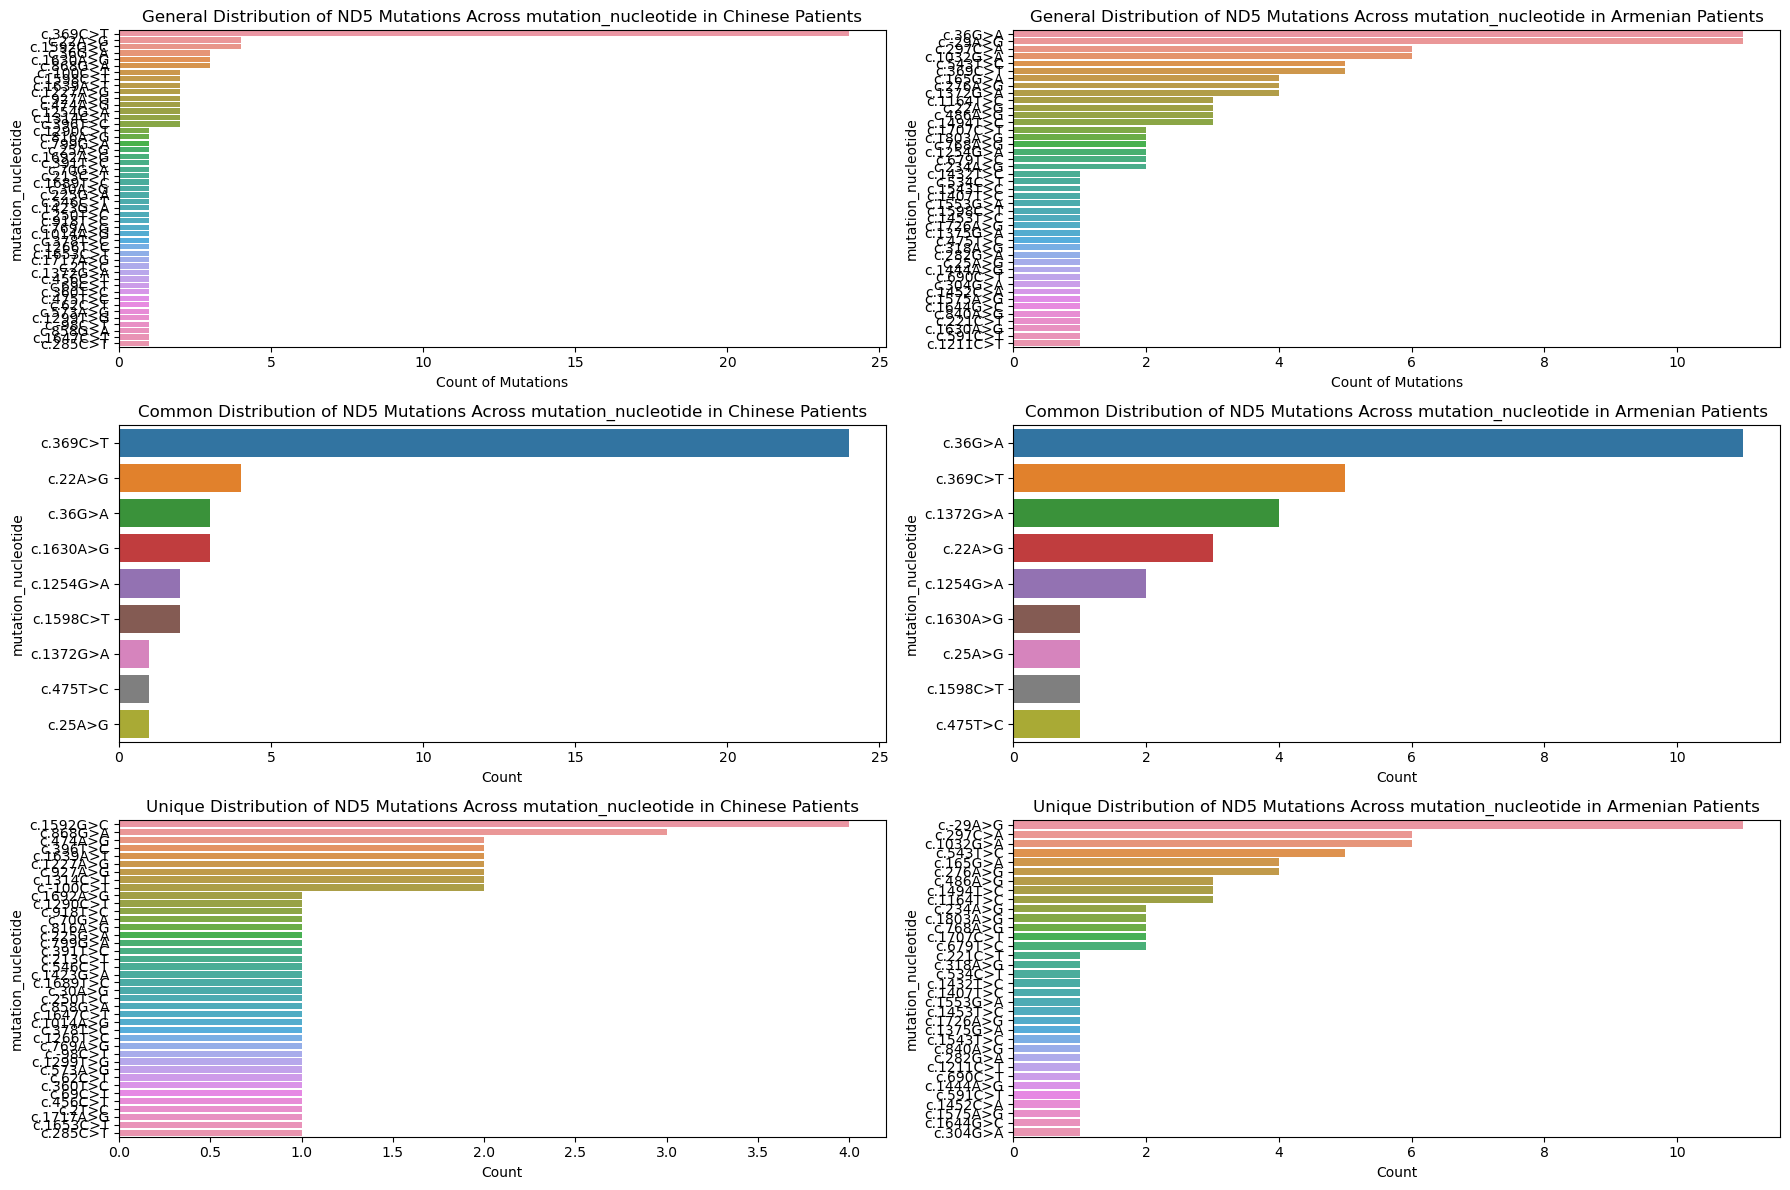

In [18]:
# Filtering the dataset for mutations in the ND5 gene for both Chinese and Armenian populations
# Analyzing ND5 mutations
# 1. Number of unique mutations in ND5 for each population
# 2. Distribution of ND5 mutations across loci
# 3. Types of ND5 gene variants

# Creating subplots for visualization
fig, axes = plt.subplots(3, 2, figsize=(18, 12))

# Plot 1: Distribution of ND5 mutations across loci for Chinese patients
sns.countplot(y="mutation_nucleotide", data=ND5_chinese, order=ND5_chinese['mutation_nucleotide'].value_counts().index, ax=axes[0, 0])
axes[0, 0].set_title('General Distribution of ND5 Mutations Across mutation_nucleotide in Chinese Patients')
axes[0, 0].set_xlabel('Count of Mutations')
axes[0, 0].set_ylabel('mutation_nucleotide')

# Plot 2: Distribution of ND5 mutations across loci for Armenian patients
sns.countplot(y="mutation_nucleotide", data=ND5_armenian, order=ND5_armenian['mutation_nucleotide'].value_counts().index, ax=axes[0, 1])
axes[0, 1].set_title('General Distribution of ND5 Mutations Across mutation_nucleotide in Armenian Patients')
axes[0, 1].set_xlabel('Count of Mutations')
axes[0, 1].set_ylabel('mutation_nucleotide')

# Plot 3: Types of ND5 gene variants in Chinese patients
sns.countplot(y="mutation_nucleotide", data=common_ND5_chinese, order= common_ND5_chinese['mutation_nucleotide'].value_counts().index, ax=axes[1, 0])
axes[1, 0].set_title('Common Distribution of ND5 Mutations Across mutation_nucleotide in Chinese Patients')
axes[1, 0].set_xlabel('Count')
axes[1, 0].set_ylabel('mutation_nucleotide')

# Plot 4: Types of ND5 gene variants in Armenian patients
sns.countplot(y="mutation_nucleotide", data=common_ND5_armenian, order=common_ND5_armenian['mutation_nucleotide'].value_counts().index, ax=axes[1, 1])
axes[1, 1].set_title('Common Distribution of ND5 Mutations Across mutation_nucleotide in Armenian Patients')
axes[1, 1].set_xlabel('Count')
axes[1, 1].set_ylabel('mutation_nucleotide')

# Plot 5: Types of ND5 gene variants in Chinese patients
sns.countplot(y="mutation_nucleotide", data=ND5_chinese_unique, order= ND5_chinese_unique['mutation_nucleotide'].value_counts().index, ax=axes[2, 0])
axes[2, 0].set_title('Unique Distribution of ND5 Mutations Across mutation_nucleotide in Chinese Patients')
axes[2, 0].set_xlabel('Count')
axes[2, 0].set_ylabel('mutation_nucleotide')

# Plot 6: Types of ND5 gene variants in Armenian patients
sns.countplot(y="mutation_nucleotide", data=ND5_armenian_unique, order=ND5_armenian_unique['mutation_nucleotide'].value_counts().index, ax=axes[2, 1])
axes[2, 1].set_title('Unique Distribution of ND5 Mutations Across mutation_nucleotide in Armenian Patients')
axes[2, 1].set_xlabel('Count')
axes[2, 1].set_ylabel('mutation_nucleotide')

plt.tight_layout()
plt.show()




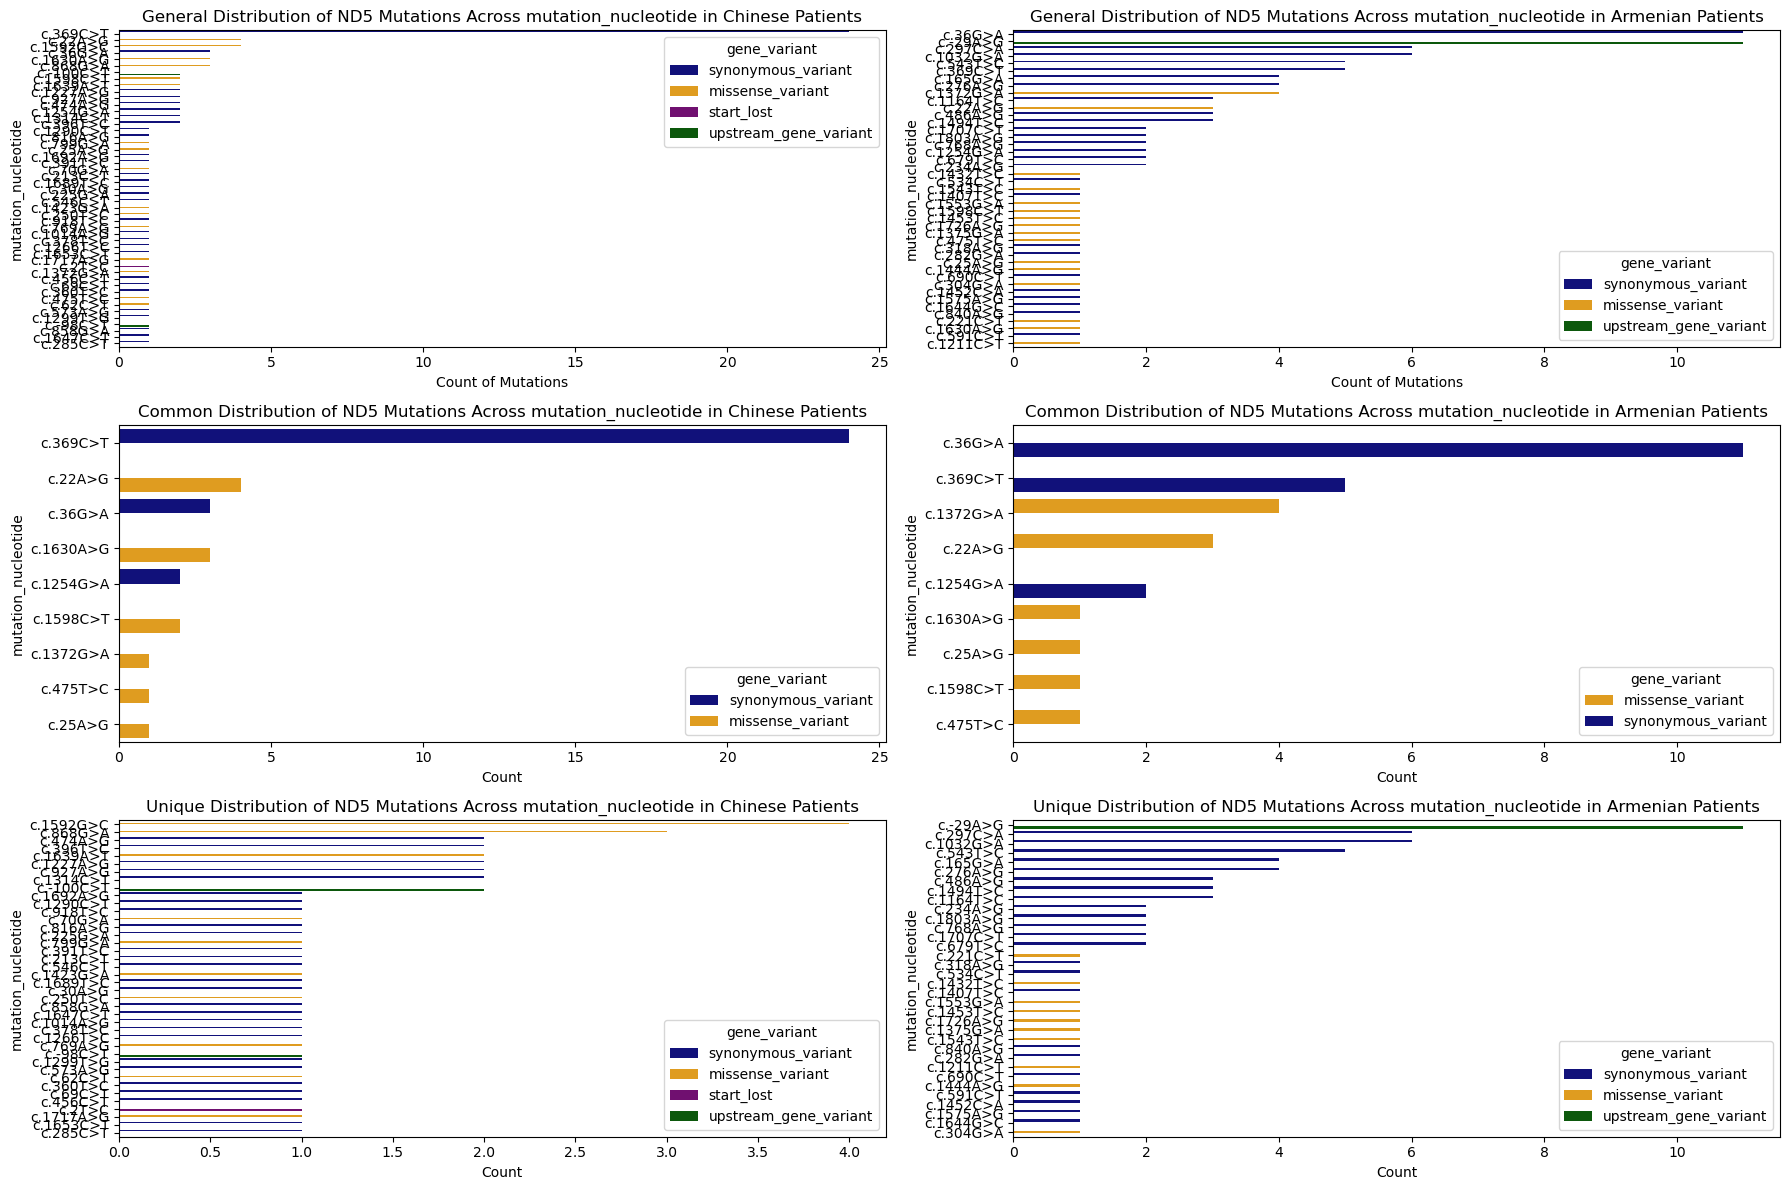

General dn/ds Chinese 0.45901638591776417
General dn/ds Armenian 0.2916666626157408
Common dn/ds Chinese 0.41379308917954866
Common dn/ds Armenian 0.6111110771604957
Unique dn/ds Chinese 0.49999998437500054
Unique dn/ds Armenian 0.18518518175583


In [20]:
# Filtering the dataset for mutations in the ND5 gene for both Chinese and Armenian populations
# Analyzing ND5 mutations
# 1. Number of unique mutations in ND5 for each population
# 2. Distribution of ND5 mutations across loci
# 3. Types of ND5 gene variants

# Creating subplots for visualization
fig, axes = plt.subplots(3, 2, figsize=(18, 12))

# Plot 1: Distribution of ND5 mutations across loci for Chinese patients
hue_column = 'gene_variant'
color_palette = {"synonymous_variant": "darkblue", "missense_variant": "orange", 'upstream_gene_variant': "darkgreen", 'missense_variant&splice_region_variant': "pink", "start_lost" : "purple"}
sns.countplot(y="mutation_nucleotide", data=ND5_chinese, order=ND5_chinese['mutation_nucleotide'].value_counts().index, hue=hue_column, palette=color_palette, ax=axes[0, 0])
axes[0, 0].set_title('General Distribution of ND5 Mutations Across mutation_nucleotide in Chinese Patients')
axes[0, 0].set_xlabel('Count of Mutations')
axes[0, 0].set_ylabel('mutation_nucleotide')

# Plot 2: Distribution of ND5 mutations across loci for Armenian patients
sns.countplot(y="mutation_nucleotide", data=ND5_armenian, order=ND5_armenian['mutation_nucleotide'].value_counts().index, hue=hue_column, palette=color_palette, ax=axes[0, 1])
axes[0, 1].set_title('General Distribution of ND5 Mutations Across mutation_nucleotide in Armenian Patients')
axes[0, 1].set_xlabel('Count of Mutations')
axes[0, 1].set_ylabel('mutation_nucleotide')

# Plot 3: Types of ND5 gene variants in Chinese patients
sns.countplot(y="mutation_nucleotide", data=common_ND5_chinese, order= common_ND5_chinese['mutation_nucleotide'].value_counts().index, hue=hue_column, palette=color_palette, ax=axes[1, 0])
axes[1, 0].set_title('Common Distribution of ND5 Mutations Across mutation_nucleotide in Chinese Patients')
axes[1, 0].set_xlabel('Count')
axes[1, 0].set_ylabel('mutation_nucleotide')

# Plot 4: Types of ND5 gene variants in Armenian patients
sns.countplot(y="mutation_nucleotide", data=common_ND5_armenian, order=common_ND5_armenian['mutation_nucleotide'].value_counts().index, hue=hue_column, palette=color_palette, ax=axes[1, 1])
axes[1, 1].set_title('Common Distribution of ND5 Mutations Across mutation_nucleotide in Armenian Patients')
axes[1, 1].set_xlabel('Count')
axes[1, 1].set_ylabel('mutation_nucleotide')

# Plot 5: Types of ND5 gene variants in Chinese patients
sns.countplot(y="mutation_nucleotide", data=ND5_chinese_unique, order= ND5_chinese_unique['mutation_nucleotide'].value_counts().index, hue=hue_column, palette=color_palette, ax=axes[2, 0])
axes[2, 0].set_title('Unique Distribution of ND5 Mutations Across mutation_nucleotide in Chinese Patients')
axes[2, 0].set_xlabel('Count')
axes[2, 0].set_ylabel('mutation_nucleotide')

# Plot 6: Types of ND5 gene variants in Armenian patients
sns.countplot(y="mutation_nucleotide", data=ND5_armenian_unique, order=ND5_armenian_unique['mutation_nucleotide'].value_counts().index, hue=hue_column, palette=color_palette, ax=axes[2, 1])
axes[2, 1].set_title('Unique Distribution of ND5 Mutations Across mutation_nucleotide in Armenian Patients')
axes[2, 1].set_xlabel('Count')
axes[2, 1].set_ylabel('mutation_nucleotide')

plt.tight_layout()
plt.show()

print("General dn/ds Chinese", chinese_dN_dS_ratio)
print("General dn/ds Armenian", armenian_dN_dS_ratio)
print("Common dn/ds Chinese", common_chinese_dN_dS_ratio)
print("Common dn/ds Armenian", common_armenian_dN_dS_ratio)
print("Unique dn/ds Chinese", chinese_dN_dS_ratio_unique)
print("Unique dn/ds Armenian", armenian_dN_dS_ratio_unique)


/tmp/ipykernel_98428/203366806.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  common_nd3_chinese['Type'] = 'Common'
/tmp/ipykernel_98428/203366806.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nd3_chinese_unique['Type'] = 'Unique'
/tmp/ipykernel_98428/203366806.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/

AttributeError: Rectangle.set() got an unexpected keyword argument 'style'

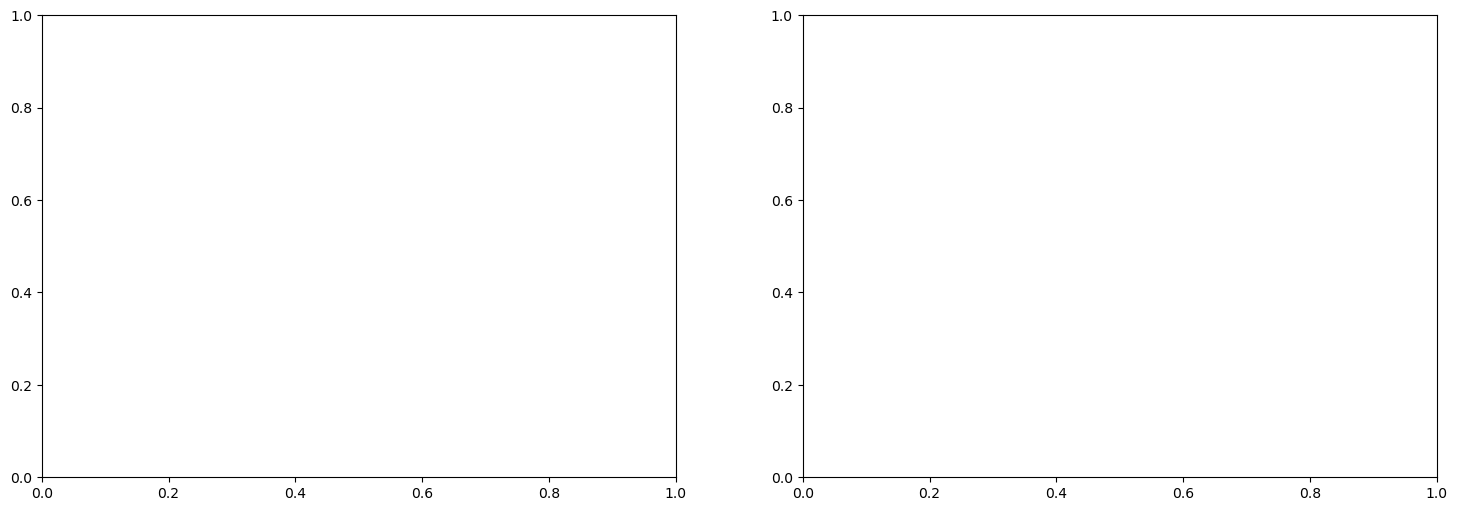